In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from CCDPApy.helper_func.helper_func import input_path
from CCDPApy.MeasuredData.Perfusion.MeasuredData import MeasuredData
from CCDPApy.BioProcess.Perfusion.BioProcess import BioProcess

pd.set_option('display.max_columns', 200)

In [2]:
file = 'perfusion_temp.xlsx'
bp = BioProcess(file_name=file)
bp.in_process()
bp.polynomial(deg=4)
bp

Cell Line:     Sample Perfusion
Run ID:        Sample Perfusion 1
Experimenter   test
Species List   ['Glc', 'Lac', 'Gln', 'NH3', 'Cell']
Feed List      ['Glc', 'Gln']

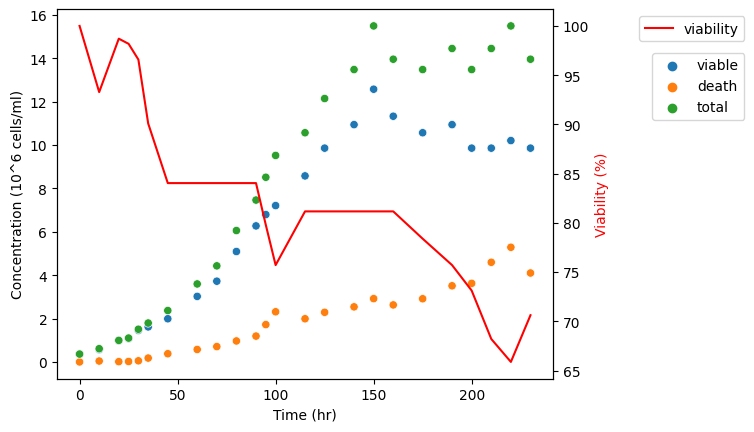

In [17]:
g = bp.get_species('cell')
df1 = g.get_conc
df2 = g.get_viability
t = g.get_run_time

# Create scatter plot with Seaborn
fig, ax1 = plt.subplots()
sns.scatterplot(data=df1, x='time', y='value', hue='state', ax=ax1)

# Create a second y-axis
ax2 = ax1.twinx()
sns.lineplot(data=df2, x='time', y='value', ax=ax2, color='r', label='viability')

# Customize the plot
ax1.set_ylabel(f"Concentration {df1['unit'].iat[0]}")
ax2.set_ylabel(f"Viability {df2['unit'].iat[0]}", color='r')
ax1.set_xlabel(f"Time {t['unit'].iat[0]}")
ax1.legend(loc='upper right', bbox_to_anchor=(1.4, 0.9))
ax2.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()